# **Forecasting a Recession in the USA**
## __Part - 1__: Introduction 

#### _Index:_<a name="tol"></a>

1.1 [Forecasting a Recession: Does it matter?](#matter)    
1.2 [If only I had known ...](#known)   
1.3 [The Goal](#goal)   
1.4 [Research Overview](#over)   
1.5 [Techincal Notes](#notes)   


## 1.1 Forecasting a Recession: Does it matter?<a name="matter"></a>

Recessions are the bogeyman of economics. They keep econimists awake at night, Governments fear them while Central Bankers try everything they have to prevent them. However, recessions are a necessary evil. They cover a pivotal role in the economic life of a society as they allow the clear-up of all the imbalances that have been piled up during the booming years.

Nevertheless, economic contractions are painfull. They bring about a lot of nasty outcomes: unemployment, income stagnation and decline, corporate crisis and, if the events take a very bad turn, social upheavals.

But here some good news: business downturns are less frequent than booming year and, at least for the US experience, they never unwind all the improvement achieved during the preceeding expansionary phase. The picture is even brighter if we consider that recession frequency more than halved from 1947 on, in comparison with the whole sample. 

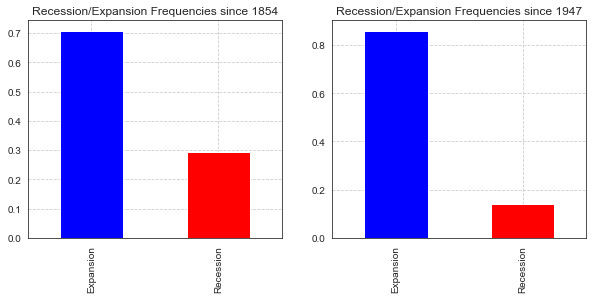

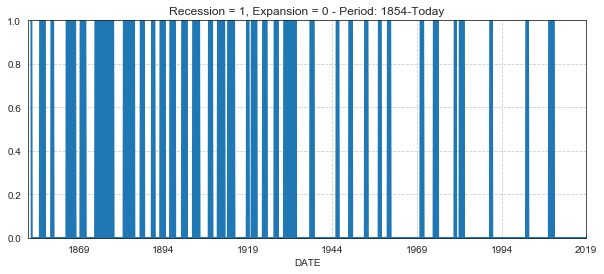

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_style("white")
path=("USREC.csv")
# import data in a pandas dataframe
df=pd.read_csv(path,parse_dates=["DATE"],index_col=False )
rng = pd.date_range('31/12/1933', '30/06/2019', freq='M')
df["DATE"]=rng
df.set_index("DATE",inplace=True)
path_1=("recessions.csv")
df_1=pd.read_csv(path_1,parse_dates=["DATE"],index_col=False )
rng_1 = pd.date_range('31/12/1854', '31/07/2019', freq='M')
df_1["DATE"]=rng_1
df_1.set_index("DATE",inplace=True)
mapper={0:"Expansion",1:"Recession"}
classes=df_1["USREC"].map(mapper)
fix, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
(classes.value_counts()/len(classes)).plot(kind='bar',color=["b","red"],grid=True,legend=False,ax=ax1,
                           title="Recession/Expansion Frequencies since 1854") 
classes47=classes.loc["1947":]
(classes47.value_counts()/len(classes47)).plot(kind='bar',color=["b","red"],grid=True,legend=False,
                                               ax=ax2,title="Recession/Expansion Frequencies since 1947")
ax1.grid(linestyle="--")
ax2.grid(linestyle="--")
plt.show();
fix.savefig('Pictures/Rec_frequency.png')
df_1["USREC"].plot.area(figsize=(10,4),grid=True,title="Recession = 1, Expansion = 0 - Period: 1854-Today")
plt.grid(linestyle="--")
plt.ylim(0,1)
plt.xlim('1854','2019');
plt.savefig('Pictures/Rec_from1854.png')

*Financial markets* and the asset classes priced on them have many of the measures that affect their prices heavily affected by the business cycle. Features such as interest rates, revenues, earning, share prices, credit risk and many others are heavily intertwined into the macroeconomic backdrop reflecting the ups and downs of the business cycle. Asset performances are affected by the economic cycles and an economic recession leaves no one unscathed. The graph below take into consideration the performances of the S&P500. The observations are the monthly returnsduring the expansionary and the recession months. 

,count,mean,std,min,25%,50%,75%,max
USREC,846.0,0.143026,0.350306,0.000000,0.000000,0.000000,0.000000,1.000000
SP500 Montly Ret.,846.0,0.006811,0.034085,-0.203911,-0.010062,0.010032,0.028411,0.120217
Expansion Montly Ret.,725.0,0.008232,0.030006,-0.125625,-0.007803,0.010261,0.028242,0.108439
Recession Montly Ret.,121.0,-0.001703,0.051608,-0.203911,-0.030175,0.003405,0.030082,0.120217


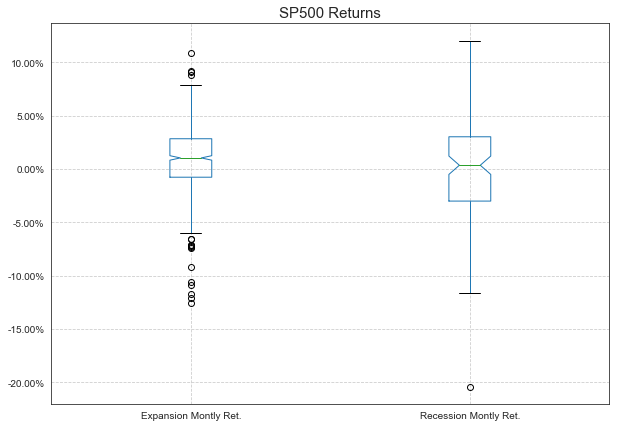

In [2]:
df["SP500 Montly Ret."]=df["sp500"].pct_change()#.shift(3)
sp_perf=df.loc[:,["USREC","SP500 Montly Ret."]].dropna()
sp_perf["Expansion Montly Ret."]=df["SP500 Montly Ret."][df["USREC"]==0]
sp_perf["Recession Montly Ret."]=df["SP500 Montly Ret."][df["USREC"]==1]
# plot boxplot
fig, ax= plt.subplots(figsize=(10,7))
sp_perf.loc["1949":,["Expansion Montly Ret.","Recession Montly Ret."]].plot(kind="box",
                                                                            notch = True,
                                                                            grid=True,
                                                                            ax=ax)
ax.grid(linestyle="--")
ax.set_xticks([1,2],('Expansion','Recession'))
ax.set_title("SP500 Returns",fontsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
fig.savefig('Pictures/Sp500_ret.png')

table=sp_perf.loc["1949":].describe().T
table.drop('USREC',axis=0,inplace=True)
table.drop('count',axis=1,inplace=True)
table.style.format("{:.2%}")
sp_perf.loc["1949":].describe().T

The table reports average return during the booming years is 0.82% vs -0.17% during the contractions. There is a difference but it is not particularly significant, also considering the volatility of the two samples. One of the reason to ascribe this consistency betwwen the two period should be ascribed to the general ability of financial markets to anticipate the beginning and the end of the two phases of the bussiness cicle of some months. Hence, the right question should be: what is the difference in the SP500 returns __if we were able to anticipate recession some time in advance__? Let's see how the picture changes if we consider 3 months: 

,mean,std,min,25%,50%,75%,max
SP500 Montly Ret.,0.66%,3.41%,-20.39%,-1.17%,0.96%,2.84%,12.02%
Expansion Montly Ret.,1.00%,3.13%,-12.56%,-0.73%,1.12%,2.96%,12.02%
Recession Montly Ret.,-1.43%,4.26%,-20.39%,-4.01%,-0.70%,1.69%,6.77%
TBills Montly Ret,0.33%,0.24%,0.00%,0.13%,0.30%,0.46%,1.27%


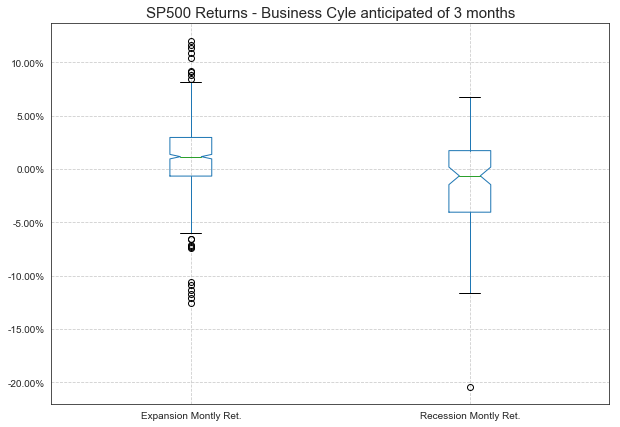

In [3]:
df["SP500 Montly Ret."]=df["sp500"].pct_change().shift(3)
sp_perf=df.loc[:,["USREC","SP500 Montly Ret."]].dropna()

sp_perf["Expansion Montly Ret."]=df["SP500 Montly Ret."][df["USREC"]==0]
sp_perf["Recession Montly Ret."]=df["SP500 Montly Ret."][df["USREC"]==1]
sp_perf["TBills Montly Ret"]=df.TB3MS.pct_change()
fig, ax= plt.subplots(figsize=(10,7))
sp_perf.loc["1949":,["Expansion Montly Ret.","Recession Montly Ret."]].plot(kind="box",
                                                                            notch = True,
                                                                            grid=True,
                                                                            ax=ax)

ax.grid(linestyle="--")
ax.set_xticks([1,2],('Expansion','Recession'))
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_title("SP500 Returns - Business Cyle anticipated of 3 months",fontsize=15)
plt.savefig('Pictures/sp500_ret_3m.png',dpi=75,bbox_inches='tight')

tab=sp_perf.loc["1947":,['SP500 Montly Ret.','Expansion Montly Ret.','Recession Montly Ret.',"TBills Montly Ret"]]
tab=pd.DataFrame(sp_perf.loc["1947":,['SP500 Montly Ret.','Expansion Montly Ret.','Recession Montly Ret.',"TBills Montly Ret"]].describe().T)
matrix=tab[['mean','std','min','25%','50%','75%','max']].style.format("{:.2%}")
display(matrix)
print("\n\n")

Even if the data still show a high degree of volatility, now the difference between the two averages is higher, -1,4% vs +1%. Now the two medians have differente sign, meaning that more than 50% of the observations are negative during recessions while we experienced positive returns in more than 50% of the case over the booming years. 

In [4]:
# t-test for independent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

# calculate the t test
alpha = 0.05
t_stat, dgf, cv, p = independent_ttest(sp_perf.loc["1947":,'Expansion Montly Ret.'].dropna(),
                                      sp_perf.loc["1947":,'Recession Montly Ret.'].dropna(),
                                      alpha)

print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, dgf, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Critical value: Accept null hypothesis that the means are equal.')
else:
    print('Critical value: Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('P-Value: Accept null hypothesis that the means are equal.')
else:
    print('P-Value: Reject the null hypothesis that the means are equal.')

t=6.058, df=868, cv=1.647, p=0.000
Critical value: Reject the null hypothesis that the means are equal.
P-Value: Reject the null hypothesis that the means are equal.


## 1.2 If only I had known ... <a name="known"></a>

Now, let's suppose that a fund manager has a quantitative model that allows to perfectly foresee a recession three months in advance. What does it means in terms of returns' improvements? In order to assess it, we need to define some trading rules:

* Two asset classes are aviable: a risky asset the SP500 and a safe asset a Treasury bill with 1 year maturity;
* When the "model" flags the economy is an expansionary phase the fund is invested 100% in the risky asset and 0% in the safe asset;
* when the "model" flags a recession ahead within three months the assets are allocated 0% in the risky asset and 100% in the safe asset;

From now on we will name this investment approach as "the Strategy". It aims at being long equity (SP500) during the booming years and long short term US treasuries during contractions. The following graphs show how this strategy would have performed against the SP500. The comparison is shown over the whole sample running from the end of 1949 until mid 2019 and for each decade within this timeframe. Recession periods are marked by gray shaded areas.

In [5]:
# An alternative dataframe is created to carry out these computations
perf=df.drop(["SP500 Montly Ret."],axis=1).dropna()
perf["F_USREC"]=perf["USREC"].shift(-3).fillna(method="ffill")
perf["SP500 Monthly Ret."]=perf.sp500.pct_change()
perf["bill_m_ret"]=perf.TB3MS.pct_change()
# We consider only the returns from 1949 on:
perf=perf.loc["1949":,:]
# Define Trading Rule:
sp_w={0:1,1:0}
bill_w={0:0,1:1}
# map the weights
perf['SP_weights']=perf['F_USREC'].map(sp_w)
perf['Bill_weights']=perf['F_USREC'].map(bill_w)
# Compute the performances
perf["Strategy"]=perf['SP500 Monthly Ret.']*perf['SP_weights']+perf['bill_m_ret']*perf['Bill_weights']
perf['Strategy Index']=100
perf.loc["1949-02-28":,'Strategy Index']=perf["Strategy"].add(1)
perf['Strategy Index']=perf['Strategy Index'].cumprod()

perf['sp500_reb']=perf['SP500 Monthly Ret.'].add(1)
perf.loc['1949-01-31','sp500_reb']=100
perf['sp500_reb']=perf['sp500_reb'].cumprod()
perf.dropna(inplace=True);
# Save Dataframe in CSV
filename='Indeces_Database.csv'
perf.to_csv(filename)
#perf['Strategy_m_ret']=perf["SP500 Monthly Ret."]*(perf['USREC'].map(trad_rule))[0]+perf["bill_m_ret"]*(perf['USREC'].map(trad_rule))[1]

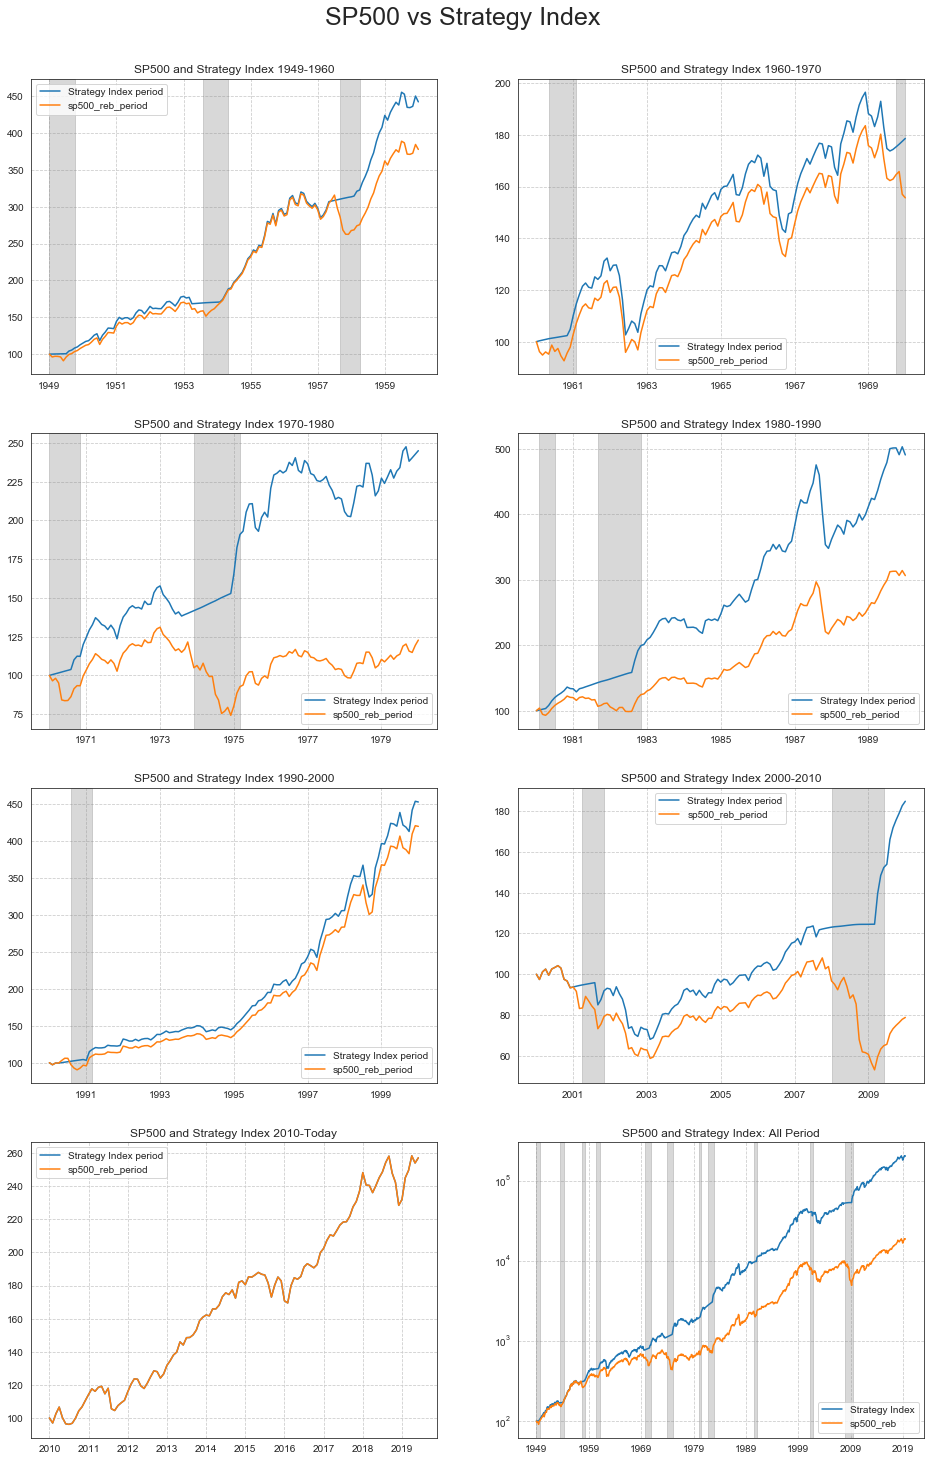

In [6]:
a=perf.reindex(rng).dropna().copy()

fig, axs = plt.subplots(nrows=4,ncols=2,figsize = (16, 25));
fig.suptitle("SP500 vs Strategy Index",fontsize=25,y=0.92)
# period 1949-1960
a['Strategy Index period']=100
a.loc["1949-02-28":,'Strategy Index period']=a.loc["1949-02-28":,"Strategy"].add(1)
a.loc["1949-01-31":,'Strategy Index period']=a.loc["1949-01-31":,'Strategy Index period'].cumprod()
a['sp500_reb_period']=a['SP500 Monthly Ret.'].add(1)
a.loc['1949-01-31','sp500_reb_period']=100
a['sp500_reb_period']=a['sp500_reb_period'].cumprod()
plot_df1=a.loc["1949-01-31":"1960-01-31",["Strategy Index period","sp500_reb_period"]]
plot_df1.plot(grid=True,title="SP500 and Strategy Index 1949-1960",ax=axs[0][0])
axs[0][0].grid(linestyle="--")
axs[0][0].axvspan('1949-01-31', '1949-10-31', alpha=0.3, color='gray')
axs[0][0].axvspan('1953-08-31', '1954-05-31', alpha=0.3, color='gray')
axs[0][0].axvspan('1957-09-30', '1958-04-30', alpha=0.3, color='gray')
# period 1960-1970
a['Strategy Index period']["1960-01-31"]=100
a.loc["1960-02-28":,'Strategy Index period']=a.loc["1960-02-28":,"Strategy"].add(1)
a.loc["1960-01-31":,'Strategy Index period']=a.loc["1960-01-31":,'Strategy Index period'].cumprod()
a['sp500_reb_period']["1960-01-31":]=a['SP500 Monthly Ret.']["1960-01-31":].add(1)
a.loc['1960-01-31','sp500_reb_period']=100
a['sp500_reb_period']["1960-01-31":]=a['sp500_reb_period']["1960-01-31":].cumprod()
plot_df1=a.loc["1960-01-31":"1970-01-31",["Strategy Index period","sp500_reb_period"]]
plot_df1.plot(grid=True,title="SP500 and Strategy Index 1960-1970",ax=axs[0][1])
axs[0][1].axvspan('1960-05-31', '1961-02-28', alpha=0.3, color='gray')
axs[0][1].axvspan('1969-10-31', '1970-01-31', alpha=0.3, color='gray')
axs[0][1].grid(linestyle="--")
# period 1970-1980
a['Strategy Index period']["1970-01-31"]=100
a.loc["1970-02-28":,'Strategy Index period']=a.loc["1970-02-28":,"Strategy"].add(1)
a.loc["1970-01-31":,'Strategy Index period']=a.loc["1970-01-31":,'Strategy Index period'].cumprod()
a['sp500_reb_period']["1970-01-31":]=a['SP500 Monthly Ret.']["1970-01-31":].add(1)
a.loc['1970-01-31','sp500_reb_period']=100
a['sp500_reb_period']["1970-01-31":]=a['sp500_reb_period']["1970-01-31":].cumprod()
plot_df1=a.loc["1970-01-31":"1980-01-31",["Strategy Index period","sp500_reb_period"]]
plot_df1.plot(grid=True,title="SP500 and Strategy Index 1970-1980",ax=axs[1][0])
axs[1][0].axvspan('1970-01-31','1970-11-30', alpha=0.3, color='gray')
axs[1][0].axvspan('1973-12-31','1975-03-31', alpha=0.3, color='gray')
axs[1][0].grid(linestyle="--")
# period 1980-1990
a['Strategy Index period']["1980-01-31"]=100
a.loc["1980-02-28":,'Strategy Index period']=a.loc["1980-02-28":,"Strategy"].add(1)
a.loc["1980-01-31":,'Strategy Index period']=a.loc["1980-01-31":,'Strategy Index period'].cumprod()
a['sp500_reb_period']["1980-01-31":]=a['SP500 Monthly Ret.']["1980-01-31":].add(1)
a.loc['1980-01-31','sp500_reb_period']=100
a['sp500_reb_period']["1980-01-31":]=a['sp500_reb_period']["1980-01-31":].cumprod()
plot_df1=a.loc["1980-01-31":"1990-01-31",["Strategy Index period","sp500_reb_period"]]
plot_df1.plot(grid=True,title="SP500 and Strategy Index 1980-1990",ax=axs[1][1])
axs[1][1].axvspan('1980-02-29','1980-07-31', alpha=0.3, color='gray')
axs[1][1].axvspan('1981-09-30','1982-11-30', alpha=0.3, color='gray')
axs[1][1].grid(linestyle="--")
# period 1990-2000   
a['Strategy Index period']["1990-01-31"]=100
a.loc["1990-02-28":,'Strategy Index period']=a.loc["1990-02-28":,"Strategy"].add(1)
a.loc["1990-01-31":,'Strategy Index period']=a.loc["1990-01-31":,'Strategy Index period'].cumprod()
a['sp500_reb_period']["1990-01-31":]=a['SP500 Monthly Ret.']["1990-01-31":].add(1)
a.loc['1990-01-31','sp500_reb_period']=100
a['sp500_reb_period']["1990-01-31":]=a['sp500_reb_period']["1990-01-31":].cumprod()
plot_df1=a.loc["1990-01-31":"2000-01-31",["Strategy Index period","sp500_reb_period"]]
plot_df1.plot(grid=True,title="SP500 and Strategy Index 1990-2000",ax=axs[2][0])
axs[2][0].axvspan('1990-08-31','1991-03-31', alpha=0.3, color='gray')
axs[2][0].grid(linestyle="--")
# period 2000-2010  
a['Strategy Index period']["2000-01-31"]=100
a.loc["2000-02-28":,'Strategy Index period']=a.loc["2000-02-28":,"Strategy"].add(1)
a.loc["2000-01-31":,'Strategy Index period']=a.loc["2000-01-31":,'Strategy Index period'].cumprod()
a['sp500_reb_period']["2000-01-31":]=a['SP500 Monthly Ret.']["2000-01-31":].add(1)
a.loc['2000-01-31','sp500_reb_period']=100
a['sp500_reb_period']["2000-01-31":]=a['sp500_reb_period']["2000-01-31":].cumprod()
plot_df1=a.loc["2000-01-31":"2010-01-31",["Strategy Index period","sp500_reb_period"]]
plot_df1.plot(grid=True,title="SP500 and Strategy Index 2000-2010",ax=axs[2][1])
axs[2][1].axvspan('2001-04-30','2001-11-30', alpha=0.3, color='gray')
axs[2][1].axvspan('2008-01-31','2009-06-30', alpha=0.3, color='gray')
axs[2][1].grid(linestyle="--")
# period 2010-Today
a['Strategy Index period']["2010-01-31"]=100
a.loc["2010-02-28":,'Strategy Index period']=a.loc["2010-02-28":,"Strategy"].add(1)
a.loc["2010-01-31":,'Strategy Index period']=a.loc["2010-01-31":,'Strategy Index period'].cumprod()
a['sp500_reb_period']["2010-01-31":]=a['SP500 Monthly Ret.']["2010-01-31":].add(1)
a.loc['2010-01-31','sp500_reb_period']=100
a['sp500_reb_period']["2010-01-31":]=a['sp500_reb_period']["2010-01-31":].cumprod()
plot_df1=a.loc["2010-01-31":,["Strategy Index period","sp500_reb_period"]]
plot_df1.plot(grid=True,title="SP500 and Strategy Index 2010-Today",ax=axs[3][0])
axs[3][0].grid(linestyle="--")
# All the sample
a.loc['1949':,['Strategy Index','sp500_reb']].plot(grid=True,logy=True,ax=axs[3][1],title="SP500 and Strategy Index: All Period");
axs[3][1].axvspan('1949-01-31','1949-10-31', alpha=0.3, color='gray')
axs[3][1].axvspan('1953-08-31','1954-05-31', alpha=0.3, color='gray')
axs[3][1].axvspan('1957-09-30','1958-04-30', alpha=0.3, color='gray')
axs[3][1].axvspan('1960-05-31','1961-02-28', alpha=0.3, color='gray')
axs[3][1].axvspan('1969-10-31','1970-11-30', alpha=0.3, color='gray')
axs[3][1].axvspan('1973-12-31','1975-03-31', alpha=0.3, color='gray')
axs[3][1].axvspan('1980-02-29','1980-07-31', alpha=0.3, color='gray')
axs[3][1].axvspan('1981-09-30','1982-11-30', alpha=0.3, color='gray')
axs[3][1].axvspan('1990-08-31','1991-03-31', alpha=0.3, color='gray')
axs[3][1].axvspan('2001-04-30','2001-11-30', alpha=0.3, color='gray')
axs[3][1].axvspan('2008-01-31','2009-06-30', alpha=0.3, color='gray')
axs[3][1].grid(linestyle="--")
fig.savefig('Pictures/ret_over_decades.png',dpi=75,bbox_inches='tight')

The strategy manages to outperforms or equal the SP500 over the whole sample and in each of the decades within. The only period where the two indeces returned the same performance has been in the sub-sample from 2010 until today: no recession occurred in this decade and as a result the strategy has been fully invested in the SP500 all over the period. In terms of average returns the SP500 had an average monthly return on 0.68% or 8.5% annualized while the Strategy had an average montly return of 0.95% or 12% annualized. The strategy shows improvements also in terms of volatility. This should not surprise since as shown before, the stock market display higher volatility during the contraction years. On average the SP500 returns have an annualize standard deviation of 12% while the Strategy 10%. Overall, the Strategy's return distribution displays thinner tails in comparison to the SP500, however, in general, the left tail (negative returns) undergoes the greater reduction in the number of observations.

C:\Users\fabrizioxueling\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,mean,std,min,25%,50%,75%,max
SP500 Monthly Ret.,0.68%,3.41%,-20.39%,-1.01%,1.00%,2.84%,12.02%
Strategy,0.95%,2.90%,-12.56%,-0.39%,0.81%,2.66%,12.02%


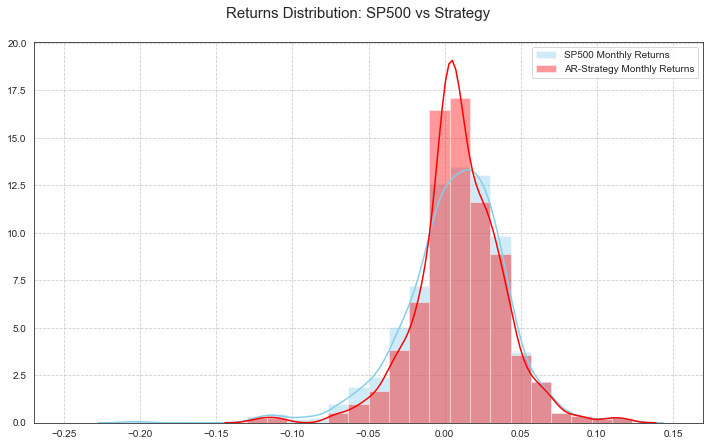

In [7]:
sns.set_style("white")

f, axes = plt.subplots(1, 1, figsize=(12, 7))
sns.distplot(a["SP500 Monthly Ret."].values, color="skyblue", label="SP500 Monthly Returns",
             bins=30, hist_kws={'range':(-0.25,0.15)})
sns.distplot(a["Strategy"].values, color="red", label="AR-Strategy Monthly Returns",
             bins=30, hist_kws={'range':(-0.25,0.15)})
plt.grid(True,linestyle='--')
plt.legend()
#sns.catplot(data=a[['SP500 Monthly Ret.','Strategy']], orient="o", kind="box",ax=axes[1]);
#axes[1].grid(True,linestyle='--');
f.suptitle("Returns Distribution: SP500 vs Strategy",fontsize=15,y=0.95);
f.savefig('Pictures/distr_comp.png',dpi=75,bbox_inches='tight')

tab=a[['SP500 Monthly Ret.','Strategy']].describe().T
matrix=tab[['mean','std','min','25%','50%','75%','max']].style.format("{:.2%}")
display(matrix)

Similarl improvements can be seen in the average Sharpe Ratio comparison between the SP500 and the outlined Strategy. The statistics shown into the table are calculated using the 12 months returns and the 1 years US t-bills yields as risk free rate.

In [8]:
sharpe_ratios_sp500=(a.loc[:,'SP500 Monthly Ret.'].rolling(12).agg(np.mean).add(1)**12-a.loc[:,'bill_m_ret'].rolling(12).agg(np.mean).add(1)**12)/a.loc[:,'SP500 Monthly Ret.'].rolling(12).agg(np.std).mul(np.sqrt(12))
sharpe_ratios_strategy=(a.loc[:,'Strategy'].rolling(12).agg(np.mean).add(1)**12-a.loc[:,'bill_m_ret'].rolling(12).agg(np.mean).add(1)**12)/a.loc[:,'Strategy'].rolling(12).agg(np.std).mul(np.sqrt(12))
sharpe_df=pd.concat([sharpe_ratios_sp500, sharpe_ratios_strategy], axis=1,names=['SP_Sharpe','Strategy_Sharpe'])
sharpe_df.columns=['SP500_Sharpe','Strategy_Sharpe']
sharpe_df=sharpe_df.dropna()
tab=sharpe_df.describe().T
matrix=tab[['mean','std','min','25%','50%','75%','max']].style.format("{:.4}")
display(matrix)

,mean,std,min,25%,50%,75%,max
SP500_Sharpe,0.8407,1.864,-3.551,-0.427,0.6559,1.74,10.02
Strategy_Sharpe,1.085,1.725,-3.551,0.0,0.9717,2.058,9.897


## 1.3 The Goal <a name="goal"></a>

This research aims to create a machine learning (ML) model able to predict three months in advance a recession in the US. The task we are tackling is to predict wheather the economy, in the foreseable future, will be in an expanding or a contracting phase. It does not focus on if the growth rate is 3% instead of 4% or -1%. As a result, this is a __classification problem__. Ideally, if we managed to create a classifier that achieve to so perfectly divide recession from booming years three months in advance we would be able to deliver returns in line with our simulated strategy. Although this topic will be explored in details later on, real life is rarely so generous to provide such a bounty like a "perfect classifier": they produce miss-classifications. Some recession periods will be labelled as expansion (or False Negative - Type II error) and the other way round for expansions (or False Positive - Type I error). Therefore the Strategy will be invested in risky assets during recession and in safe assets during expansion with detrimental effects on performance.   

## 1.4 Research Overview <a name="over"></a>

This research is articulated over several chapters, going through the main steps of creating a ML Model. Each step will have a dedicated chapter. These Chapters will cover the following topics:

1. Data Uploading, Feature Engineering and Exploratory Data Analysis;
1. Feature Selection;
1. Data Scaling;
1. Alternative Approaches to Cross-Validation;
1. Models' Evaluation Metrics;
1. Classifier/Model Selection; and
1. Model's Performance Evaluation and Backtesting.

In analyzing each of these passages we will study some the options available and the the decitions taken trying to assess the effects they might have on the final performance of the models. Well, it seems there is a long road ahead to our final destination... let's get started!

## 1.5 Techincal Notes <a name="notes"></a>

All the code and graphs have been created in Phyton leveraging on Jupyter Notebook & JupyterLab and Google Colab. I have used a wide number of libraries. Besides the essential Pandas and Numpy, my gratitude goes to Matplotlib, Seaborn and Scikit-learn.

<img src="scikit-learn-logo-notext.png"><img src="Seaborn.png">
<img src="Matplotlib.png">


[Go to the top](#tol)